# Giga coders
## Machine learning

17 Agostos 2019


## Hello  TensorFlow

In [401]:
import tensorflow as tf
#tensorflow
a2 = tf.constant(5,tf.float32)
b2 = tf.constant(6,tf.float32)

result=tf.multiply(a2,b2)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  r=sess.run(result)
  print(r)

30.0


In [402]:
n = tf.placeholder(tf.float32)
a2 = tf.constant(5,tf.float32)
b2 = tf.constant(6,tf.float32)

result=tf.multiply(a2,b2)
result=tf.multiply(result,n)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  r=sess.run(result, feed_dict={n: 2})
  print(r)

60.0


In [403]:
m = tf.Variable(2.0,tf.float32)
n = tf.Variable(1.0,tf.float32)

num= m + n
step = tf.group(m.assign(num),n.assign(num))

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for x in range(0,3):
    sess.run(step)
  print(sess.run(m))

12.0


In [404]:
test = tf.Variable(0.0,tf.float32)
test2=1
print(test)
print(test2)

num2= test2 + 1
num = test +  1
step = test.assign(num)

init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for x in range(0,20):
    r=sess.run(step)
    print(r)

<tf.Variable 'Variable_206:0' shape=() dtype=float32_ref>
1
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


## Perceptrón hardlim
![alt text](https://miro.medium.com/max/700/1*lJUC67L1oFBgwmFK2Sii7g.png)

### Problemática 
" Small change in (W.X + b) i.e. weights and biases cause the output of the perceptron to flip from 0 to1 and vice versa which changes the behavior of the network very randomly. So, the slowness of learning is lost and hence the network can’t generalize a solution. "



## Sigmoid neuron

![alt text](https://miro.medium.com/max/700/1*PIgLZb1qqXzLSqyLy-qj3w.png)

![alt text](https://miro.medium.com/max/700/1*Qw2ZMPNamS4jX8n726kZ-A.png)

![alt text](https://miro.medium.com/max/700/1*cD71DYr1YfhotK5cYfHvXg.png)

![alt text](https://miro.medium.com/max/700/1*AtloL_0v3a7JnqL2Esj5PQ.png)

In [405]:

import tensorflow as tf
import cv2
import numpy as np
from numpy import array, dot, random
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import choice
%matplotlib inline
plt.rcParams['figure.figsize'] = (13.0, 9.0)
print("alles ist gut")


alles ist gut


In [0]:
NUM_FEATURES = 2
NUM_ITER = 1000
learning_rate = 0.01

In [407]:
entradas = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)
salidas = np.array([0, 1, 1, 1], np.float32)
salidas = np.reshape(salidas, [4,1])
print("Entradas....")
print(entradas)
print("Salidas....")
print(salidas)

Entradas....
[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]
Salidas....
[[0.]
 [1.]
 [1.]
 [1.]]


In [0]:
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])


Placeholder: https://www.tensorflow.org/api_docs/python/tf/placeholder


In [409]:
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)

print("Pesos...")
print(W)
print("BIAS...")
print(B)

#init_op = tf.initialize_all_variables()
#with tf.Session() as sess:
    #sess.run(init_op) 
    #print (sess.run(W))


Pesos...
<tf.Variable 'Variable_207:0' shape=(2, 1) dtype=float32_ref>
BIAS...
<tf.Variable 'Variable_208:0' shape=(1, 1) dtype=float32_ref>


Variable: https://www.tensorflow.org/api_docs/python/tf/Variable

In [0]:
#y^ = sigmoid(SUM(Xi*Wi)+b)
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) 
#error...
err = Y - yHat
#error Bias and weights....
deltaW = tf.matmul(tf.transpose(X), err )
deltaB = tf.reduce_sum(err, 0) 
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB

step = tf.group(W.assign(W_), B.assign(B_)) 

 


In [0]:
#tf.reset_default_graph()
#tf.get_default_graph().get_operations()

In [0]:

with tf.Session() as sess: 
  init = tf.global_variables_initializer()
  sess.run(init)

  for k in range(NUM_ITER):
    sess.run([step], feed_dict={X: entradas, Y: salidas})
    
  W = np.squeeze(sess.run(W))
  b = np.squeeze(sess.run(B))



W: [2.4979842 2.4979842]
b: -0.5824846
plot_y: [ 0.43318185 -0.9668181 ]


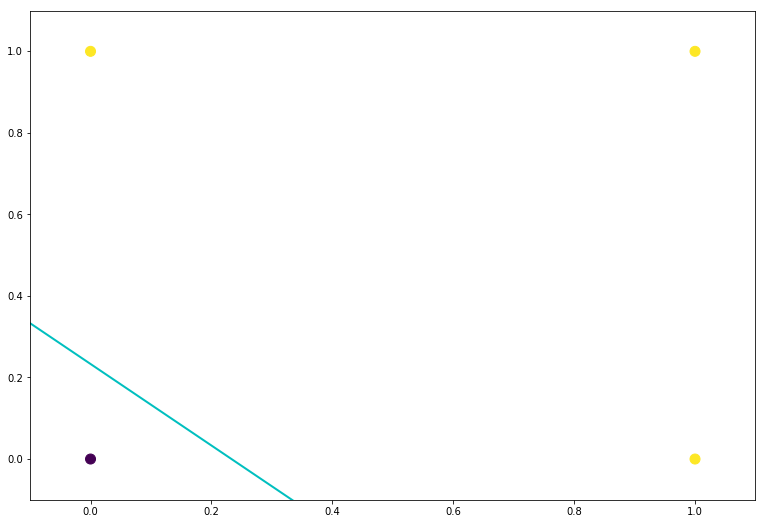

In [413]:

plot_x = np.array([np.min(entradas[:, 0] - 0.2), np.max(entradas[:, 1]+0.2)])
plot_y = (-1 * (W[0] * plot_x + b))/W[1]

 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(entradas[:, 0], entradas[:, 1], c=salidas.ravel(), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='c', linewidth=2)
plt.xlim([-0.1, 1.1]); plt.ylim([-0.1, 1.1]);
plt.show()
